# Basic sweep example without conviniece functions 

In this notebook we illustrate how to use the bare sweep classes without the use of convinience functions. 

__NOTE__: this notebook __does not work yet__.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from qcodes import new_experiment
from qcodes.dataset.plotting import plot_by_id
from qcodes import Parameter
from pytopo.sweep.base import Sweep, Measure, Nest, Chain
from pytopo.sweep.measurement import SweepMeasurement

In [3]:
experiment = new_experiment("sweep_introduction", sample_name="intro")

Let us make a 1D sweep first 

In [5]:
x = Parameter("x", set_cmd=None, get_cmd=None)
m = Parameter("m")
m.get = lambda:np.sin(x())

sweep_object = Nest(
    Sweep(x.set, lambda: np.linspace(0, 6, 100)), 
    Measure(m.get)
)

meas = SweepMeasurement()
meas.register_sweep(sweep_object)

with meas.run() as datasaver: 
    for data in sweep_object: 
        datasaver.add_result(*data.items())
    
    dataid = datasaver.run_id  # convenient to have for plotting
    
plot_by_id(dataid)

TypeError: __init__() missing 1 required positional argument: 'point_function'

Now make a 2D sweep

Starting experimental run with id: 156


([<matplotlib.axes._subplots.AxesSubplot at 0x2009a06eb38>],
 [<matplotlib.colorbar.Colorbar at 0x2009a3f5588>])

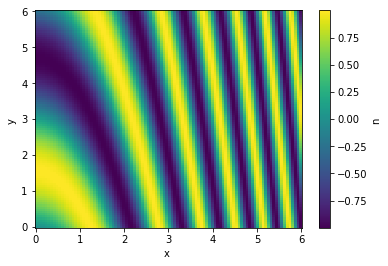

In [4]:
x = Parameter("x", set_cmd=None, get_cmd=None)
y = Parameter("y", set_cmd=None, get_cmd=None)

n = Parameter("n")
n.get = lambda:np.sin(x()**2 + y())

sweep_object = Nest(
    ParameterSweep(x, lambda: np.linspace(0, 6, 100)), 
    ParameterSweep(y, lambda: np.linspace(0, 6, 100)),
    ParameterWrapper(n)
)

meas = SweepMeasurement()
meas.register_sweep(sweep_object)

with meas.run() as datasaver: 
    for data in sweep_object: 
        datasaver.add_result(*data.items())
    
    dataid = datasaver.run_id  # convenient to have for plotting
    
plot_by_id(dataid)

We can also interleave 1D and 2D sweeps, or even nD sweeps

Starting experimental run with id: 157


([<matplotlib.axes._subplots.AxesSubplot at 0x2009a152438>,
 [<matplotlib.colorbar.Colorbar at 0x2009b7ce0f0>, None])

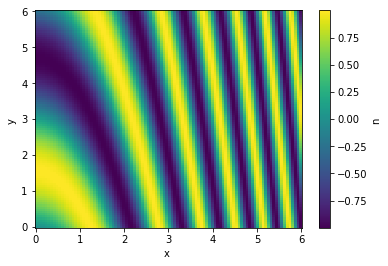

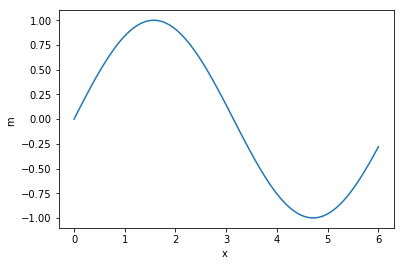

In [5]:
x = Parameter("x", set_cmd=None, get_cmd=None)
y = Parameter("y", set_cmd=None, get_cmd=None)

m = Parameter("m")
m.get = lambda:np.sin(x())

n = Parameter("n")
n.get = lambda:np.sin(x()**2 + y())

sweep_object = Nest(
    ParameterSweep(x, lambda: np.linspace(0, 6, 100)), 
    Chain(
        Nest(
            ParameterSweep(y, lambda: np.linspace(0, 6, 100)),
            ParameterWrapper(n)
        ), 
        ParameterWrapper(m)
    )
)

meas = SweepMeasurement()
meas.register_sweep(sweep_object)

with meas.run() as datasaver: 
    for data in sweep_object: 
        datasaver.add_result(*data.items())
    
    dataid = datasaver.run_id  # convenient to have for plotting
    
plot_by_id(dataid)